In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AtlanticFish.csv')

In [3]:
df.head()

,Year,Country,Species,Region,Catch (Tons)
0,1950,Canada,Atlantic bluefin tuna,"Atlantic, Northwest",432.0
1,1951,Canada,Atlantic bluefin tuna,"Atlantic, Northwest",299.0
2,1952,Canada,Atlantic bluefin tuna,"Atlantic, Northwest",368.0
3,1953,Canada,Atlantic bluefin tuna,"Atlantic, Northwest",201.0
4,1954,Canada,Atlantic bluefin tuna,"Atlantic, Northwest",175.0


In [4]:
df.columns

Index(['Year', 'Country', 'Species', 'Region', 'Catch (Tons)'], dtype='object')

In [5]:
us = df[df.Country == 'United States of America']

In [24]:
swordfish = df[df.Species == 'Swordfish']

In [25]:
swordfish


,Year,Country,Species,Region,Catch (Tons)
280,1950,Canada,Swordfish,"Atlantic, Northwest",1000.0
281,1951,Canada,Swordfish,"Atlantic, Northwest",1200.0
282,1952,Canada,Swordfish,"Atlantic, Northwest",1400.0
283,1953,Canada,Swordfish,"Atlantic, Northwest",1500.0
284,1954,Canada,Swordfish,"Atlantic, Northwest",2000.0
...,...,...,...,...,...
1605,2015,United States of America,Swordfish,"Atlantic, Western Central",594.0
1606,2016,United States of America,Swordfish,"Atlantic, Western Central",825.0
1607,2017,United States of America,Swordfish,"Atlantic, Western Central",635.0
1608,2018,United States of America,Swordfish,"Atlantic, Western Central",709.0


<AxesSubplot:xlabel='Year', ylabel='Catch (Tons)'>

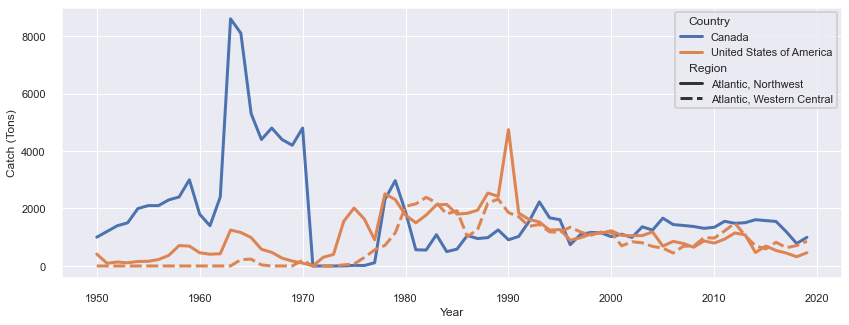

In [26]:
sns.set(rc={'figure.figsize': (14, 5)})
sns.set_context("poster", font_scale = 0.5, rc={"grid.linewidth": 1.0})
sns.lineplot(x = "Year", y = "Catch (Tons)", data = swordfish, hue='Country', style='Region')

# Catch Analysis by Species

In [58]:
pivot = pd.pivot_table(df, index='Country', values='Catch (Tons)', columns = 'Species', aggfunc = sum, fill_value = 0)
print(pivot)

Species                   Atlantic bluefin tuna  Atlantic cod  \
Country                                                         
Canada                                  32792.0   14814347.00   
Greenland                                   0.0    1536539.00   
Iceland                                     0.0   18506015.00   
Ireland                                   273.4     249854.03   
Norway                                 107005.4   20518037.85   
Portugal                                    0.0    5219023.00   
United Kingdom                              0.0   13585688.00   
United States of America                78827.0    1420062.00   

Species                   Atlantic halibut  Atlantic salmon  Swordfish  \
Country                                                                  
Canada                           178380.00            73644     123727   
Greenland                             0.00                0          0   
Iceland                           65377.00           

<AxesSubplot:xlabel='Year', ylabel='Catch (Tons)'>

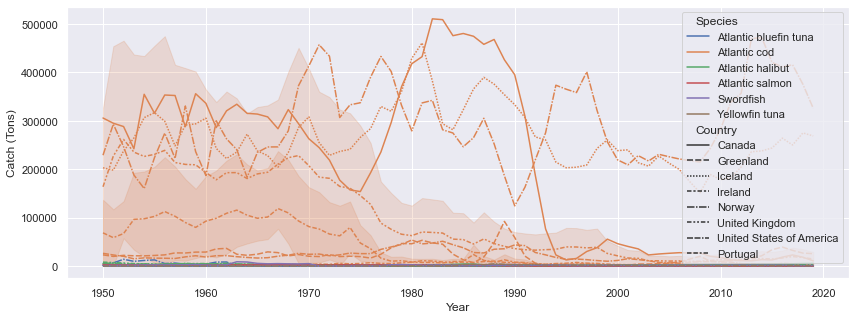

In [69]:
sns.lineplot(x = "Year", y = "Catch (Tons)", data = df, hue='Species', style = 'Country')

Atlantic cod has the numbers and huge variation in numbers.

In [59]:
pivot = pd.pivot_table(cod, index='Country', values='Catch (Tons)', columns = 'Region', aggfunc = sum, fill_value = 0)
print(pivot)

Region                    Atlantic, Northeast  Atlantic, Northwest
Country                                                           
Canada                                   0.00             14814347
Greenland                                0.00              1536539
Iceland                           18506015.00                    0
Ireland                             249854.03                    0
Norway                            20518037.85                    0
Portugal                            185918.00              5033105
United Kingdom                    12978796.00               606892
United States of America                 0.00              1420062


<AxesSubplot:xlabel='Country', ylabel='Catch (Tons)'>

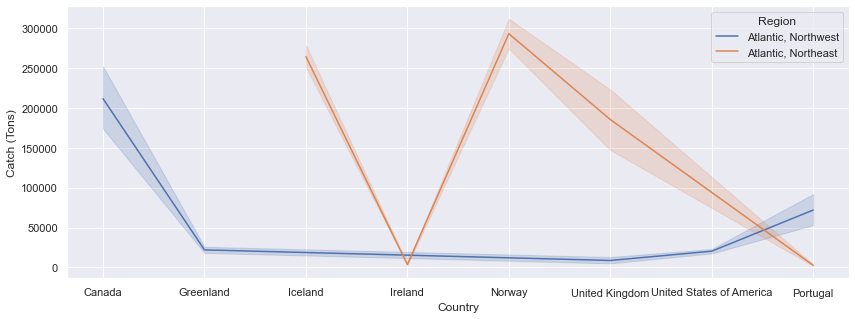

In [61]:
sns.lineplot(x = "Country", y = "Catch (Tons)", data = cod, hue='Region')

# Decline of the Atlantic cod fishery

In [23]:
# Creating df for cod species:
cod = df[df.Species == 'Atlantic cod']
cod

,Year,Country,Species,Region,Catch (Tons)
70,1950,Canada,Atlantic cod,"Atlantic, Northwest",305800.0
71,1951,Canada,Atlantic cod,"Atlantic, Northwest",295000.0
72,1952,Canada,Atlantic cod,"Atlantic, Northwest",288100.0
73,1953,Canada,Atlantic cod,"Atlantic, Northwest",242200.0
74,1954,Canada,Atlantic cod,"Atlantic, Northwest",354800.0
...,...,...,...,...,...
1885,2015,Portugal,Atlantic cod,"Atlantic, Northwest",4889.0
1886,2016,Portugal,Atlantic cod,"Atlantic, Northwest",6299.0
1887,2017,Portugal,Atlantic cod,"Atlantic, Northwest",5485.0
1888,2018,Portugal,Atlantic cod,"Atlantic, Northwest",4805.0


# Pair plot Analysis for the Atlantic Cod

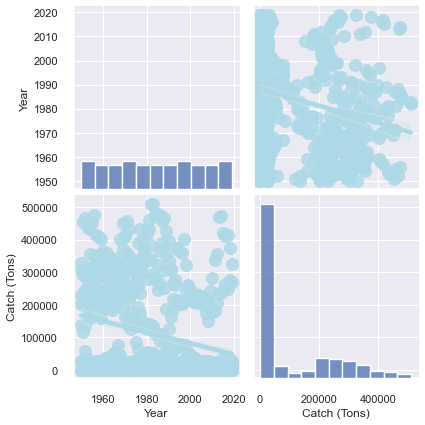

In [27]:
sns.pairplot(cod, height = 3, plot_kws = {"color": "lightblue"}, kind = 'reg')

# Box and Swarm plots

C:\Users\gmula\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gmula\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gmula\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gmula\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\gmula\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.9% of the points

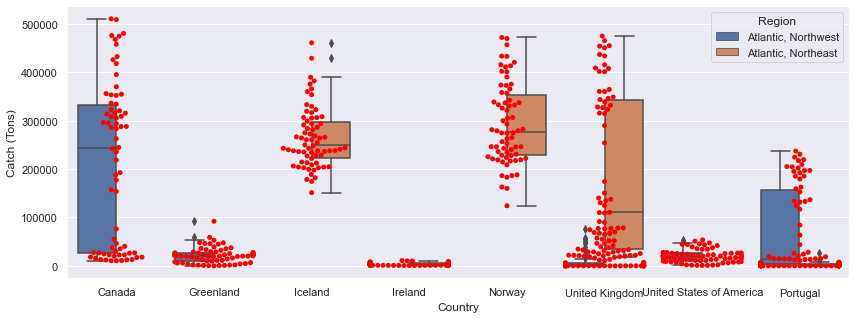

In [63]:
ax = sns.boxplot(x = 'Country', y = 'Catch (Tons)', data = cod, hue = 'Region')
ax = sns.swarmplot(x = 'Country', y = 'Catch (Tons)', data = cod, color = 'red')

Canada -ve, UK +ve

# Total Atlantic cod catch per Country

In [54]:
pivot = pd.pivot_table(cod, index='Country', values='Catch (Tons)', aggfunc = sum, fill_value = 0)
print(pivot)

                          Catch (Tons)
Country                               
Canada                     14814347.00
Greenland                   1536539.00
Iceland                    18506015.00
Ireland                      249854.03
Norway                     20518037.85
Portugal                    5219023.00
United Kingdom             13585688.00
United States of America    1420062.00


Country wise catch data:  Norway had the highest 

# Cod Catch per Region

sns.set(rc={'figure.figsize': (20, 10)})
dx = sns.boxplot(x = 'Country', y = 'Catch (Tons)', data = cod, hue = 'Region')
dx = sns.swarmplot(x = 'Country', y = 'Catch (Tons)', data = cod, color = 'red')

Canada and UK have been most inconsistent fluctuations with their catch with Portugal following them

Canada went over fishing, hence negatively skewed and UK is positively skewed


# Catch over time per Country

<AxesSubplot:xlabel='Year', ylabel='Catch (Tons)'>

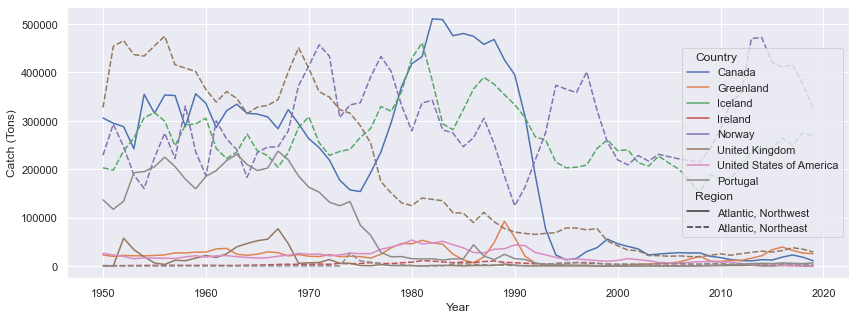

In [52]:
sns.set(rc={'figure.figsize': (14, 5)})
sns.lineplot(x = "Year", y = "Catch (Tons)", data = cod, hue='Country', style='Region')


Availability of the Atlantic Cod has been over 400000 Tons until 2000

Between 1975 and 1990, Canada over exploited the catch 

The decline of numbers started since 2000

Overexploitation by international fishing fleets forced the species into decline. 

In the early-1990s, the industry collapsed entirely. Several cod stocks collapsed in the 1990s  

In 1992 the Canadian government announced a moratorium which was intended 2 years on cod fishing 

In 2000, WWF placed cod on the endangered species list.

By 2002, after a 10-year moratorium on fishing, the cod had still not regained it's numbers leading to a long-term ecological shift and the downfall of North American Costal economy.
